In [21]:
# Import necessary libraries: numpy, scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy
import lmfit

In [22]:
# To recap, so far we have measured:
# f_c: the bare resonator frequency
# f_ro: the dispersive resonator frequency
# chi = fc - f_ro: the dispersive shift
# f_q: the qubit frequency

# These parameters are all we need to begin the next experiment: a time-domain Rabi experiment.
# The aim of this experiment is to determine how long we need to drive the qubit for
# in order to rotate it from |0> to |1>

# This driving signal will simply rotate the qubit between the |0> and |1> states for as long
# as it is applied to the qubit.
# So we will obtain an oscillating signal.
# Since we know `f_q`, we will send the signal at this frequency, and vary the time
# that we send it for.

In [23]:
SIMULATION_LOW_V = 0.2
SIMULATION_HIGH_V = 0.5
SIMULATION_RABI_FREQUENCY = 0.1 # GHz
SIMULATION_NOISE_SCALE = 0.1

In [24]:
def cosine_signal(x, frequency, phase, amplitude, offset):
    """A cosine curve.

    :param x: x-parameter.
    :param frequency: Frequency of the oscillation.
    :param phase: Starting phase of the oscillation.
    :param amplitude: amplitude of the oscillation.
    :param offset: oscillation offset.
    """
    return offset + amplitude * np.cos((x * frequency) + phase)

In [25]:
def measure_rabi(time_axis, averages):
    """Simulate the response of a qubit to a rabi experiment.

    :param time_axis: List of values of pulse length.
    :param averages: Number of averages per point.
    """
    rabi_probability_distribution = cosine_signal(time_axis, SIMULATION_RABI_FREQUENCY, 0, -0.5, 0.5)
    response = []
    for i in range(averages):
        resp_axis = []
        for val in rabi_probability_distribution:
            rng = np.random.random_sample()
            if val < rng:
                resp_axis.append(SIMULATION_LOW_V + np.random.random_sample()*SIMULATION_NOISE_SCALE)
            else:
                resp_axis.append(SIMULATION_HIGH_V + np.random.random_sample()*SIMULATION_NOISE_SCALE)
        response.append(resp_axis)

    return response

In [26]:
# The parameter we will sweep this time is the duration of the pulse.
# Normally, our electronics will have a minimum pulse length.
# So we cannot set a time of 0. 
# Let's say the shortest pulse we can send is 4 ns.
# Most electronics do not have an upper limit (except the limit of their buffer)
# so we can choose the maximum pulse length.
minimum_pulse_length = 4 # ns
maximum_pulse_length = 100 # ns
num_points = 100

# Again, we can either do single-shot, or average over many such shots.
# To perform a single-shot experiment, set `averages` to 1.
averages = 100

# Generate the different pulse lengths:
pulse_time_axis = np.linspace(minimum_pulse_length, maximum_pulse_length, num_points)

In [27]:
# Now we send this instruction to the qubit. We do this multiple times (the parameter
# `averages`) and obtain the response.
response = measure_rabi(pulse_time_axis, averages)

In [28]:
# Note that the response is a 2D array (or a list of lists). 
# To obtain the average response, we take the mean.
avg_response = np.mean(response, axis=0)

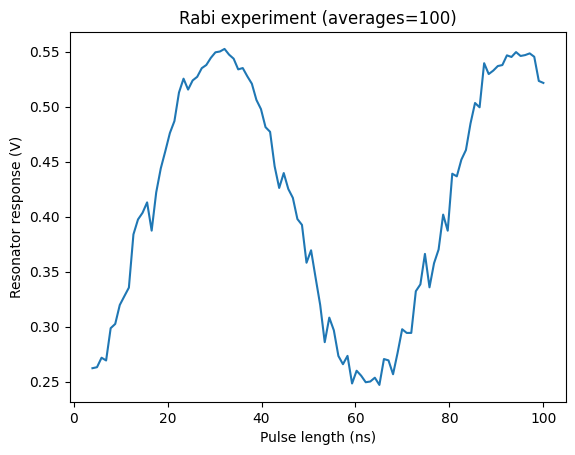

In [29]:
# Now we can plot this and see what it looks like:
plt.figure()
plt.plot(pulse_time_axis, avg_response)
plt.ylabel('Resonator response (V)')
plt.xlabel('Pulse length (ns)')
plt.title(f'Rabi experiment ({averages=})')
plt.show()

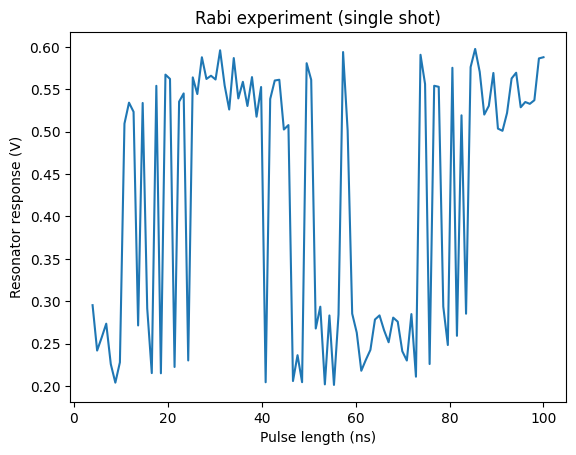

In [30]:
# And a single-shot plot:
plt.figure()
plt.plot(pulse_time_axis, response[0])
plt.ylabel('Resonator response (V)')
plt.xlabel('Pulse length (ns)')
plt.title(f'Rabi experiment (single shot)')
plt.show()

In [ ]:
# Here's your challenge:
# can you extract the parameter `pi_pulse_time` from this graph?
# Remember that ~0.2 V corresponds to |0>, and ~0.5 V is |1>, and a pi pulse
# is a pulse that drives the qubit from |0> to |1>.

# As a hint: try fitting a cosine curve. Auto-fitting a cosine curve is a hard problem!
# Can you think of a way to make it easier?

# Challenge #2: there is not just one single value for pi_pulse_time. Can you think of a
# reason why we use only the smallest pi_pulse_time value?